In [42]:
# Se importan las librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from PIL import Image
import torch
from torch.autograd import Variable
import hiddenlayer as hl
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from PIL import ImageFilter
import torchvision.transforms as transforms
import torchvision

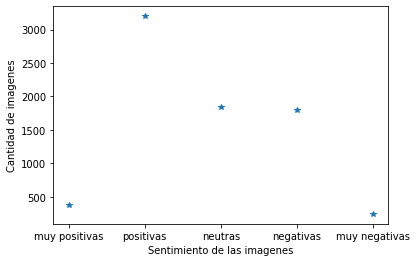


La base de datos esta bastante desbalanceada.
Hay 5592 datos de entenamiento y 1865 de testeo inicialmente


array([2384, 1381, 1360,  281,  186])

In [16]:
# Carpeta donde estan los datos
os.chdir('/Users/mariamorris/Documents/Universidad/2021-2/reto/Reto-W-J')

# Se buscan las direcciones de las imagenes
positivas = glob('./TODAS/0/*.png')
neutras = glob('./TODAS/1/*.png')
negativas = glob('./TODAS/2/*.png')
muy_positivas = glob('./TODAS/3/*.png')
muy_negativas = glob('./TODAS/4/*.png')

# Se hace una matriz con los datos
I = [muy_positivas,positivas[:3200],neutras,negativas,muy_negativas] # Se toman solo los primeros 2300 datos de positiva
names = ['muy positivas','positivas','neutras','negativas','muy negativas']

# Se grafica la cantidad de datos
lens = [len(i) for i in I]
plt.plot(names,lens,'*')
plt.ylabel('Cantidad de imagenes')
plt.xlabel('Sentimiento de las imagenes')
plt.show()

print('')
print('La base de datos esta bastante desbalanceada. Ya se quitaron datos de positiva')

# Se vuelven aleatorias las rutas de los diferente sentimientos para separar los conjuntos de entrenamiento y testeo
I2 = []
for i in I:
    for j in i:
        I2.append(j)
np.random.shuffle(I2)
train,test= train_test_split(I2)
print('Hay {} datos de entenamiento y {} de testeo inicialmente'.format(len(train),len(test)))

# Transforma los datos para adaptarlos a la entrada del modelo preentrenado 
data_transform = transforms.Compose([
                 transforms.Resize((299, 299)),
                 transforms.Grayscale(3),
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                 ])
data_transform2 = transforms.Compose([
                 transforms.Resize((299, 299)),
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                 ])

# Datos de entrenamiento
N_train = len(train)
X_train = []
Y_train = []

# Datos de prueba
N_test = len(test)
X_test = []
Y_test = []

# Se abren las imagenes de entrenamiento 
for i, imagefile in enumerate(train):
    
    img = Image.open(imagefile)
    if len(np.array(img).shape) == 3: ##Aqui sabemos si la imagen es a color o a blanco y negro
        X_train.append( np.array(data_transform2(img.convert('RGB'))))
    else:
        X_train.append(np.array(data_transform(img)))
    
    Y_train.append(int(imagefile.split('/')[2]))

# Se abren las imagenes de testeo 
for i, test_file in enumerate(test):
    
    img = Image.open(test_file)
    if len(np.array(img).shape) == 3: ##Aqui sabemos si la imagen es a color o a blanco y negro
        X_test.append( np.array(data_transform2(img.convert('RGB'))))
    else:
        X_test.append(np.array(data_transform(img)))
        
    Y_test.append(int(test_file.split('/')[2]))

a=np.unique(Y_train,return_counts=True)
a[1] # Se revisa la cantidad de datos de cada sentimiento

In [3]:
#Aumentaciónn de datos
"""
cant = 0
for count in range(0,2):
    for imagefile in train:
        os.chdir('/Users/mariamorris/Documents/Universidad/2021-2/reto/Reto-W-J/')
        a=np.unique(Y_train,return_counts=True)
        numero = int(imagefile.split('/')[2])
        if numero != 0 and os.path.isfile(imagefile+'_r_'+str(count)+'.png')==False and numero != 1 and numero != 2:
            cant+=1
            im=Image.open(imagefile)
            im=im.convert("RGB")
            r,g,b=im.split()
            r=r.convert("RGB")
            g=g.convert("RGB")
            b=b.convert("RGB")
            im_blur=im.filter(ImageFilter.GaussianBlur)
            im_unsharp=im.filter(ImageFilter.UnsharpMask)

        if numero != 0 and os.path.isfile(imagefile+'_r_'+str(count)+'.png')==False and numero != 1 and numero != 2:
            os.chdir('/Users/mariamorris/Documents/Universidad/2021-2/reto/Reto-W-J/Copy')
            red = imagefile+'_r_'+str(count)+'.png'
            green = imagefile+'_g_'+str(count)+'.png'
            blue = imagefile+'_b_'+str(count)+'.png'
            blured = imagefile+'_bl_'+str(count)+'.png'
            unsharped = imagefile+'_un_'+str(count)+'.png'
            news = [red,green,blue,blured,unsharped]
            r.save(red)
            g.save(green)
            b.save(blue)
            im_blur.save(blured)
            im_unsharp.save(unsharped)
            
        if cant >= 3000:
            break 
    if cant >= 3000:
            break 

os.chdir('/Users/mariamorris/Documents/Universidad/2021-2/reto/Reto-W-J/')

#https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6
"""

'\ncant = 0\nfor count in range(0,2):\n    for imagefile in train:\n        os.chdir(\'/Users/mariamorris/Documents/Universidad/2021-2/reto/Reto-W-J/\')\n        a=np.unique(Y_train,return_counts=True)\n        numero = int(imagefile.split(\'/\')[2])\n        if numero != 0 and os.path.isfile(imagefile+\'_r_\'+str(count)+\'.png\')==False and numero != 1 and numero != 2:\n            cant+=1\n            im=Image.open(imagefile)\n            im=im.convert("RGB")\n            r,g,b=im.split()\n            r=r.convert("RGB")\n            g=g.convert("RGB")\n            b=b.convert("RGB")\n            im_blur=im.filter(ImageFilter.GaussianBlur)\n            im_unsharp=im.filter(ImageFilter.UnsharpMask)\n\n        if numero != 0 and os.path.isfile(imagefile+\'_r_\'+str(count)+\'.png\')==False and numero != 1 and numero != 2:\n            os.chdir(\'/Users/mariamorris/Documents/Universidad/2021-2/reto/Reto-W-J/Copy\')\n            red = imagefile+\'_r_\'+str(count)+\'.png\'\n            gree

In [17]:
# Se juntan la canntidad de datos de cada que vienen en la base de datos 
nn = [a[1][3],a[1][0],a[1][1],a[1][2],a[1][4]]

2350 3621
2384 2384
2350 11179
2350 10885
2350 2361


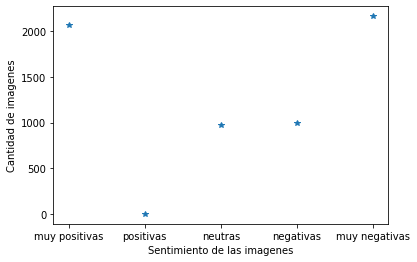

Verificamos las longitudes: Tr 11784, Te 1865


In [18]:
# Carpeta donde estan los datos aumentados
os.chdir('/Users/mariamorris/Documents/Universidad/2021-2/reto/Reto-W-J/Copy')

# Se buscan las direcciones de las imagenes
positivas_c = glob('./TODAS/0/*.png')
neutras_c = glob('./TODAS/1/*.png')
negativas_c = glob('./TODAS/2/*.png')
muy_positivas_c = glob('./TODAS/3/*.png')
muy_negativas_c = glob('./TODAS/4/*.png')


# Se hace una matriz con los datos
I_c = [muy_positivas_c,positivas_c,neutras_c,negativas_c,muy_negativas_c]

# Se limita la cantidad de datos al valor mas pequeño de tipo de datos 2350
for i in range(len(I_c)):
    c = len(I_c[i])
    b = nn[i]
    if c+b>2350:
        n = 2350-b
        I_c[i]=I_c[i][:n]
    print(len(I_c[i])+b,c+b)

# Se grafica la cantidad de datos aumentados 
lens_c = [len(i) for i in I_c]
plt.plot(names,lens_c,'*')
plt.ylabel('Cantidad de imagenes')
plt.xlabel('Sentimiento de las imagenes')
plt.show()


# Se vuelven aleatorios los datos aumentados por sentimiento 
I2 = []
for i in I_c:
    for j in i:
        I2.append(j)
        
np.random.shuffle(I2)

# Se abren las imagenes de entrenamiento aumentadas en las de enntrenamiento originales 
for imagefile in I2:
    try:
        img = Image.open(imagefile)
        if len(np.array(img).shape) == 3: ##Aqui sabemos si la imagen es a color o a blanco y negro
            X_train.append( np.array(data_transform2(img.convert('RGB'))))
        else:
            X_train.append(np.array(data_transform(img)))
        Y_train.append(int(imagefile.split('/')[2]))
    except:
        print('hubo un error con: {}'.format(imagefile))


print('Verificamos las longitudes: Tr {}, Te {}'.format(len(X_train), len(X_test)))

(array([0, 1, 2, 3, 4]), array([2384, 2350, 2350, 2350, 2350]))

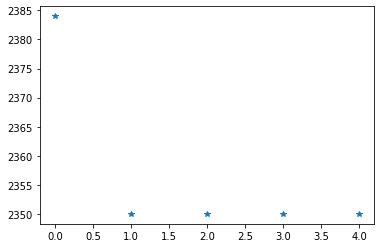

In [19]:
# Cantidad de imagenes que se van a utilizar para entrenar el modelo

a=np.unique(Y_train,return_counts=True)

len(Y_train), len(X_train)

plt.plot(a[0],a[1],'*')
a

In [21]:
# Se pasan los archivos de arrays de numpy a tensores de torch. 
def tensor (X,Y):
    X = Variable(torch.from_numpy(np.array(X))).float()
    Y = Variable(torch.from_numpy(np.array(Y))).long()
    return X,Y

X_test_p, Y_test_p = tensor(X_test, Y_test)
X_train_p, Y_train_p = tensor(X_train, Y_train)

In [52]:
# Tamaño del batch
batch_size = 32

# Se cargan los tesores a torch
train_ds = torch.utils.data.TensorDataset(X_train_p, Y_train_p)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [53]:
# Se carga el modelo preentrenado 
model = torchvision.models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [54]:
# Se modifica el modelo conforme a las necesidades del reto

for p in model.parameters():
    p.requires_grad = False

out_dim = 5

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.5),  
    torch.nn.Linear(9216, 4096),
    torch.nn.ReLU(inplace=True),
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(4096, 4096),
    torch.nn.ReLU(inplace=True),
    torch.nn.Linear(4096, out_dim)
)

model.load_state_dict(model.state_dict())

#model = model.cuda()

model.train()

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [55]:
# Metodo para hacer la matriz de confusion conforme a los datos verdaderos y los predichos
def CM(Y_true, Y_pred, classes):
    fig = plt.figure(figsize=(10, 10))
    cm = confusion_matrix(Y_true.detach().cpu().numpy(), Y_pred.detach().cpu().numpy())
    lclasses = np.arange(0,classes)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmap=plt.cm.Blues
    ax = fig.add_subplot(1,1,1)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
    ax.set_xlabel("Predicted",size=20)
    ax.set_ylabel("True",size=20)
    ax.set_ylim(classes-0.5, -0.5)

    plt.setp(ax.get_xticklabels(), size=12)
    plt.setp(ax.get_yticklabels(), size=12)

    fmt = '.2f'
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

    plt.show()
    
# Metodo que entrena el modelo preentrenado conforme a los valores que estran por parametro 
def entrena(X_train,Y_train,X_test,Y_test,model,optimizer,criterion,train_dl):
    n_epochs = 10

    history = hl.History()
    canvas = hl.Canvas()

    iter = 0

    for epoch in range(n_epochs):
        for batch_idx, (X_train_batch, Y_train_batch) in enumerate(train_dl):
            # Pasamos os datos a 'cuda'

            X_train_batch = X_train_batch
            Y_train_batch = Y_train_batch

            # Realiza una predicción
            Y_pred = model(X_train_batch)

            # Calcula el loss
            loss = criterion(Y_pred, Y_train_batch)

            Y_pred = torch.argmax(Y_pred, 1)

            f1 = f1_score(Y_train_batch,Y_pred, average='macro')

            # Calcula el accuracy
            acc = sum(Y_train_batch == Y_pred)/len(Y_pred)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if iter%10 == 0:
                #-- Visualizamos la evolución de los score loss y accuracy
                history.log((epoch+1, iter), loss=loss, accuracy=acc,f1=f1)
                with canvas:
                    canvas.draw_plot(history["loss"])
                    canvas.draw_plot(history["accuracy"])
                    canvas.draw_plot(history["f1"])

            iter += 1
            del X_train_batch, Y_train_batch, Y_pred

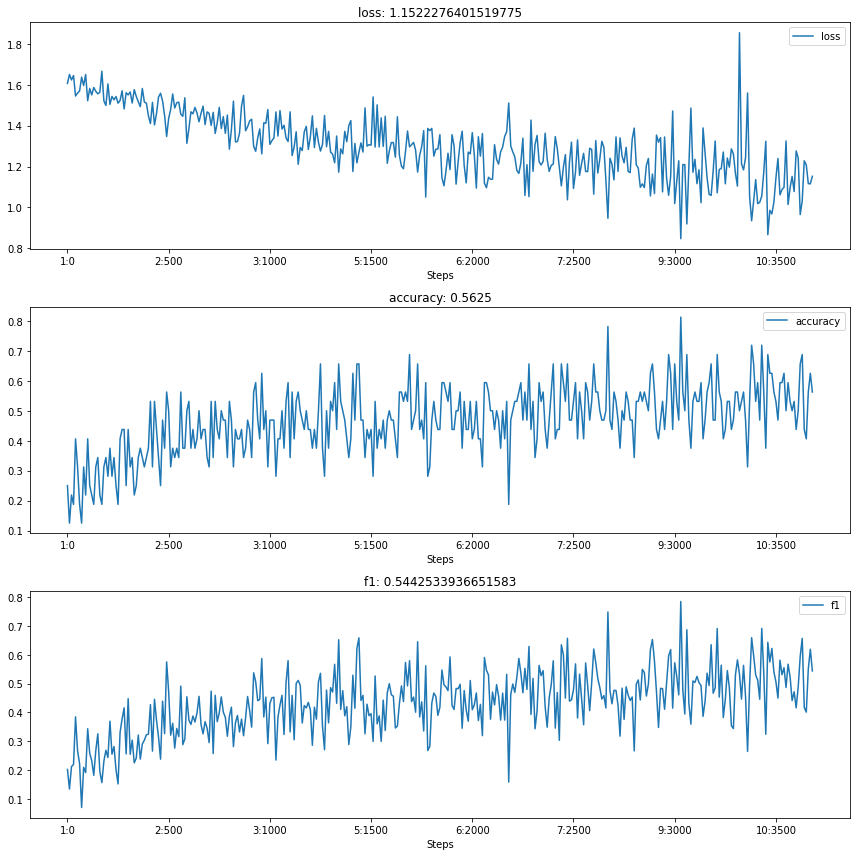

In [56]:
# Metodos de optimizacion y de criterio para el entrenamiento del modelo 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.02)
criterion = torch.nn.CrossEntropyLoss()

print('*')
print('*')
print('Entrenando el modelo')
print('*')

# Se entrena el modelo
entrena(X_train_p,Y_train_p,X_test_p, Y_test_p,model,optimizer,criterion,train_dl)

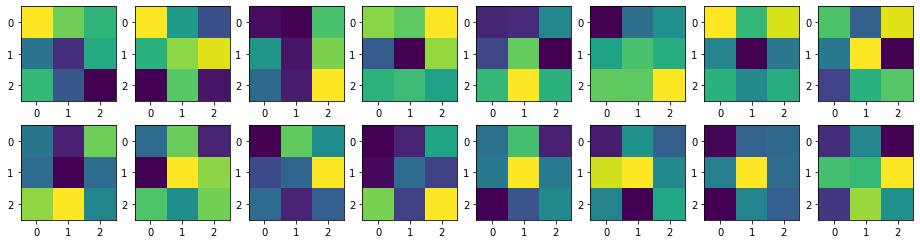

In [57]:
kernels = list(model.children())[0][10].weight.detach()

fig = plt.figure(figsize=(16,4))
k = 0
for i in range(16):
    plt.subplot(2,8,k+1)
    plt.imshow(kernels[0][i].squeeze())
    k += 1
plt.show()

In [58]:
# Se evalua el modelo conforme a la perdida, el valor f1 y la accuracy.
model.eval()

Y_pred = model(X_test_p)
loss = criterion(Y_pred,Y_test_p)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test_p, Y_pred, average='macro')

acc = sum(Y_test_p == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:1.33, F1:0.37, Acc:0.44


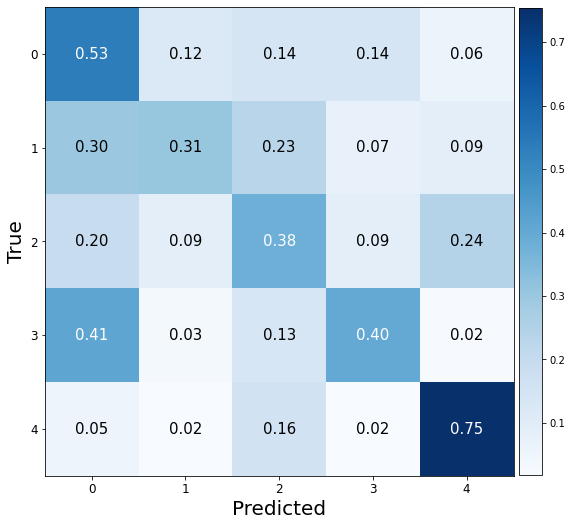

In [59]:
# Se grafica la matriz de convolucion 
CM(Y_test_p, Y_pred, 5)

In [60]:
import datetime
datetime.datetime.now()

datetime.datetime(2021, 9, 28, 4, 48, 42, 366685)

In [61]:
# Se guarda el modelo 
torch.save(model,'modelo_2.pt')